In [1]:
#conda install datasets matplotlib pandas, conda activate python_course 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)
    

c:\Users\seane\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#MATPLOTLIB: ADVANCED CUSTOMISATION
#Filter for Data Analyst Data
df_DA = df[df['job_title_short'] =='Data Analyst'].copy()

<Axes: xlabel='job_posted_month_no'>

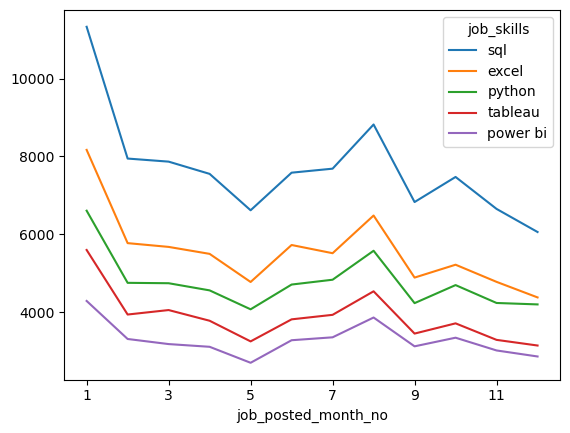

In [18]:
#copy and paste from exercise 12

#1. Create a new column for month number

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month 
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index = 'job_posted_month_no',
                          columns = 'job_skills', 
                          aggfunc= 'size', 
                          fill_value = 0) # fill_value fills NA values as 0



#Sort the skills by count 
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

#don't need total column anymore (would impact the plot)

df_DA_pivot = df_DA_pivot.drop('Total')
#now we can plot it!
df_DA_pivot.iloc[:, :5].plot(kind = "line")

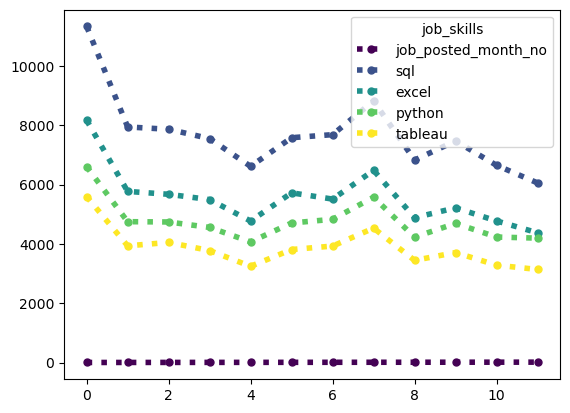

In [17]:
#adding visual customisations

df_DA_pivot.iloc[:, :5].plot(
    kind = "line", 
    linewidth = 4,
    linestyle=':',
    colormap = 'viridis',
    marker = 'o',
    markersize = 5,
  
)
plt.show()

In [31]:
#customising scatterplot from exercise 15

#Explode the 'job_skills' into individual rows

df_exploded = df.explode('job_skills')
df_exploded

#Calculate the avg salary and count of job postings per skill

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count =('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') # is a tuble with ('column of interest', 'how we want to agg it')
)

#limit to the top skills
skill_count = 15
skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skills_stats


,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


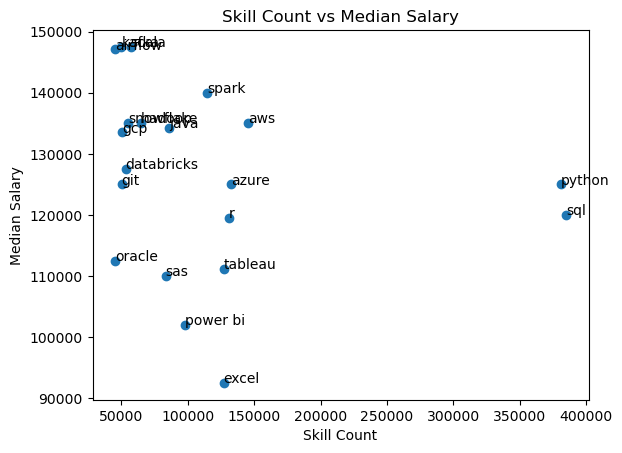

In [26]:
#plotting:

plt.scatter(skills_stats['skill_count'], skills_stats['median_salary'])

# Adding text labels
for i in range(len(skills_stats)):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], skills_stats.index[i])

plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.title('Skill Count vs Median Salary')
plt.show()

In [27]:
#customising scatterplot:
#first conda env list, conda activate python_couse, conda install adjustText
from adjustText import adjust_text

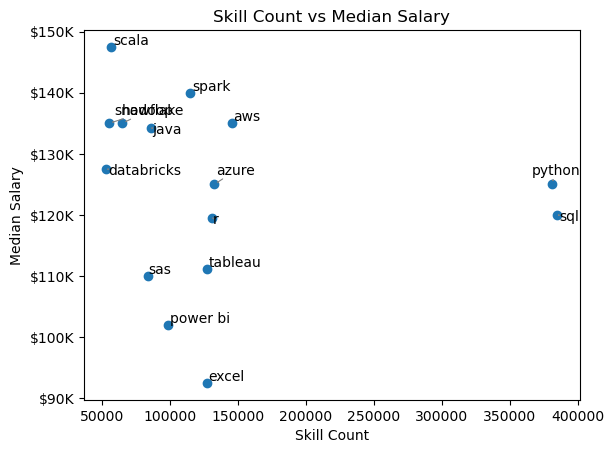

In [37]:
#plotting:

from adjustText import adjust_text

plt.scatter(skills_stats['skill_count'], skills_stats['median_salary'])

texts = [] # new line
# Adding text labels
for i in range(len(skills_stats)):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], skills_stats.index[i]))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, poss: f'${int(y/1000)}K')) # convery y axis better


adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray', lw=0.8)) # new line
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.title('Skill Count vs Median Salary')
plt.show()